In [38]:
pip install numpy matplotlib ffmpeg

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

In [8]:
"""
IF U1 IS PROVIDED: For solving a wave given two input waves with a time step between them
IF U1 IS NOT PROVIDED: For solving a static wave given an input wave (initial wave velocity is zero)
Endpoints are held constant at zero displacement
Momentum and energy are conserved
"""
def solve(xBound, tbound, dx, dt, c, u0, u1=np.zeros(1, np.double)):
    #Initialize array and special numbers for calculations
    a = []
    u2 = np.zeros(u0.size, np.double)
    C = c*dt/dx
    C2 = C**2
    Nx = int(xbound//dx)
    Nt = int(tbound//dt)
    
    #Detect static wave and calculate u1 if needed
    if u1.all() == 0:
        u1 = calculate_u1_for_static_wave(u0, Nx, C2)
 
    #Calculate u2 and produce a
    for n in range(1, Nt+1):
        #Update inner mesh points for t=n+1
        for i in range(1, Nx):
            u2[i] = 2*u1[i] - u0[i] + C2*(u1[i+1] - 2*u1[i] + u1[i-1])

        #Reinforce bounds
        u2[0] = 0; u2[Nx] = 0
        
        #Update a
        if n%10 == 0:
            a.append(np.copy(u2))
        
        #Change Variables
        u0[:], u1[:] = u1, u2
        
    return a

"""
Helper function for solve()
Calculates u1 for the special condition of no initial movement provided   
Mimics dispersion
Momentum and energy are conserved
"""
def calculate_u1_for_static_wave(u0, Nx, C2):
    u1 = np.zeros(u0.size, np.double)
        
    for i in range(1, Nx):
        u1[i] = u0[i] + 0.5*C2*(u0[i+1] - 2*u0[i] + u0[i-1])
    
    u1[0] = 0; u1[Nx] = 0
    
    return u1

In [9]:
#N-point uniform mesh
n = 1000
dx = 1.0/(n-1)
x0 = np.linspace(0.0, 1.0, n) #returns an array of n values evenly spaced between 0 and 1

#Step setup
c = 1.0 #speed of sound
dt = 5e-4

#Quality check
C = c * dt/dx #Courant's number
print("CFL constant is {0} (should be < 1 for stability)".format(C)) #CFL constant is representation of clarity and balanced step sizes

#Set up initial condition
u0 = np.exp(-(5*(x0-0.5))**2)
u1 = np.exp(-(5*(x0-0.5-c*dt))**2)

#Space for time steps
xbound = 1
tbound = 2.5
a = []
a = solve(xbound, tbound, dx, dt, c, u0, u1)

CFL constant is 0.4995 (should be < 1 for stability)


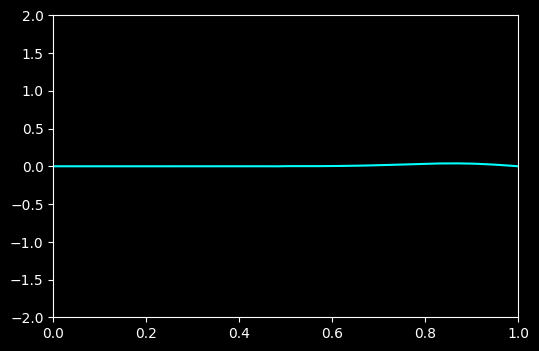

In [10]:
plt.style.use('dark_background')

fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.add_subplot(1,1,1)
k = 0

def animate(i):
    global k
    x = a[k]
    k += 1
    ax1.clear()
    plt.plot(x0,x,color='cyan')
    plt.ylim([-2,2])
    plt.xlim([0.0,1.0])
    
anim = animation.FuncAnimation(fig,animate,frames=len(a)-1,interval=20)
HTML(anim.to_jshtml())